In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from load_data import load_data

In [7]:
# This function is used to pre-process the raw csv data
# We are only focused on Stage 1 measurements and before; therefore, we remove everything after stage 1 measurements
# We will also remove stage 1 setpoints, since these are not needed for predicting data
# We remove the timestamp, since this is not needed to predict data

def pre_processing_data(df):
    last_column_to_keep = "Stage1.Output.Measurement14.U.Setpoint"
    if last_column_to_keep in df.columns:
        columns_to_keep = df.columns[:df.columns.get_loc(last_column_to_keep) + 1]
        df = df[columns_to_keep]
    df = df.loc[:, ~df.columns.str.endswith('Setpoint')]
    df = df.drop(columns=['time_stamp'])
    df_processed_one = df
    
    return df_processed_one

In [8]:
# Here we plot the measurement readings to see how they vary

def plotting_measurements(df_processed_one):
    stage1_measurement_columns = [col for col in df_processed_one.columns if col.startswith("Stage1.Output.Measurement")]

    num_columns = len(stage1_measurement_columns)
    fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, num_columns * 2), sharex=True)

    # Plot each column in a separate subplot
    for i, col in enumerate(stage1_measurement_columns):
        axes[i].scatter(df_processed_one.index, df_processed_one[col], label=col, s=10)
        axes[i].set_title(col)
        axes[i].legend(loc='upper right')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

In [9]:
# Based on the results from plotting_measurements, we pick a stage1 output that we want to predict
# In this project, we are going to solely focus on Stage1.Measurement14, so let's remove all the other Stage1 measurements

def removing_other_measurements(df_processed_one):
    stage1_measurement_columns = [col for col in df_processed_one.columns if col.startswith("Stage1.Output.Measurement")]
    columns_to_drop = [col for col in stage1_measurement_columns if col != "Stage1.Output.Measurement14.U.Actual"]
    df_processed_two = df_processed_one.drop(columns=columns_to_drop)

    return df_processed_two



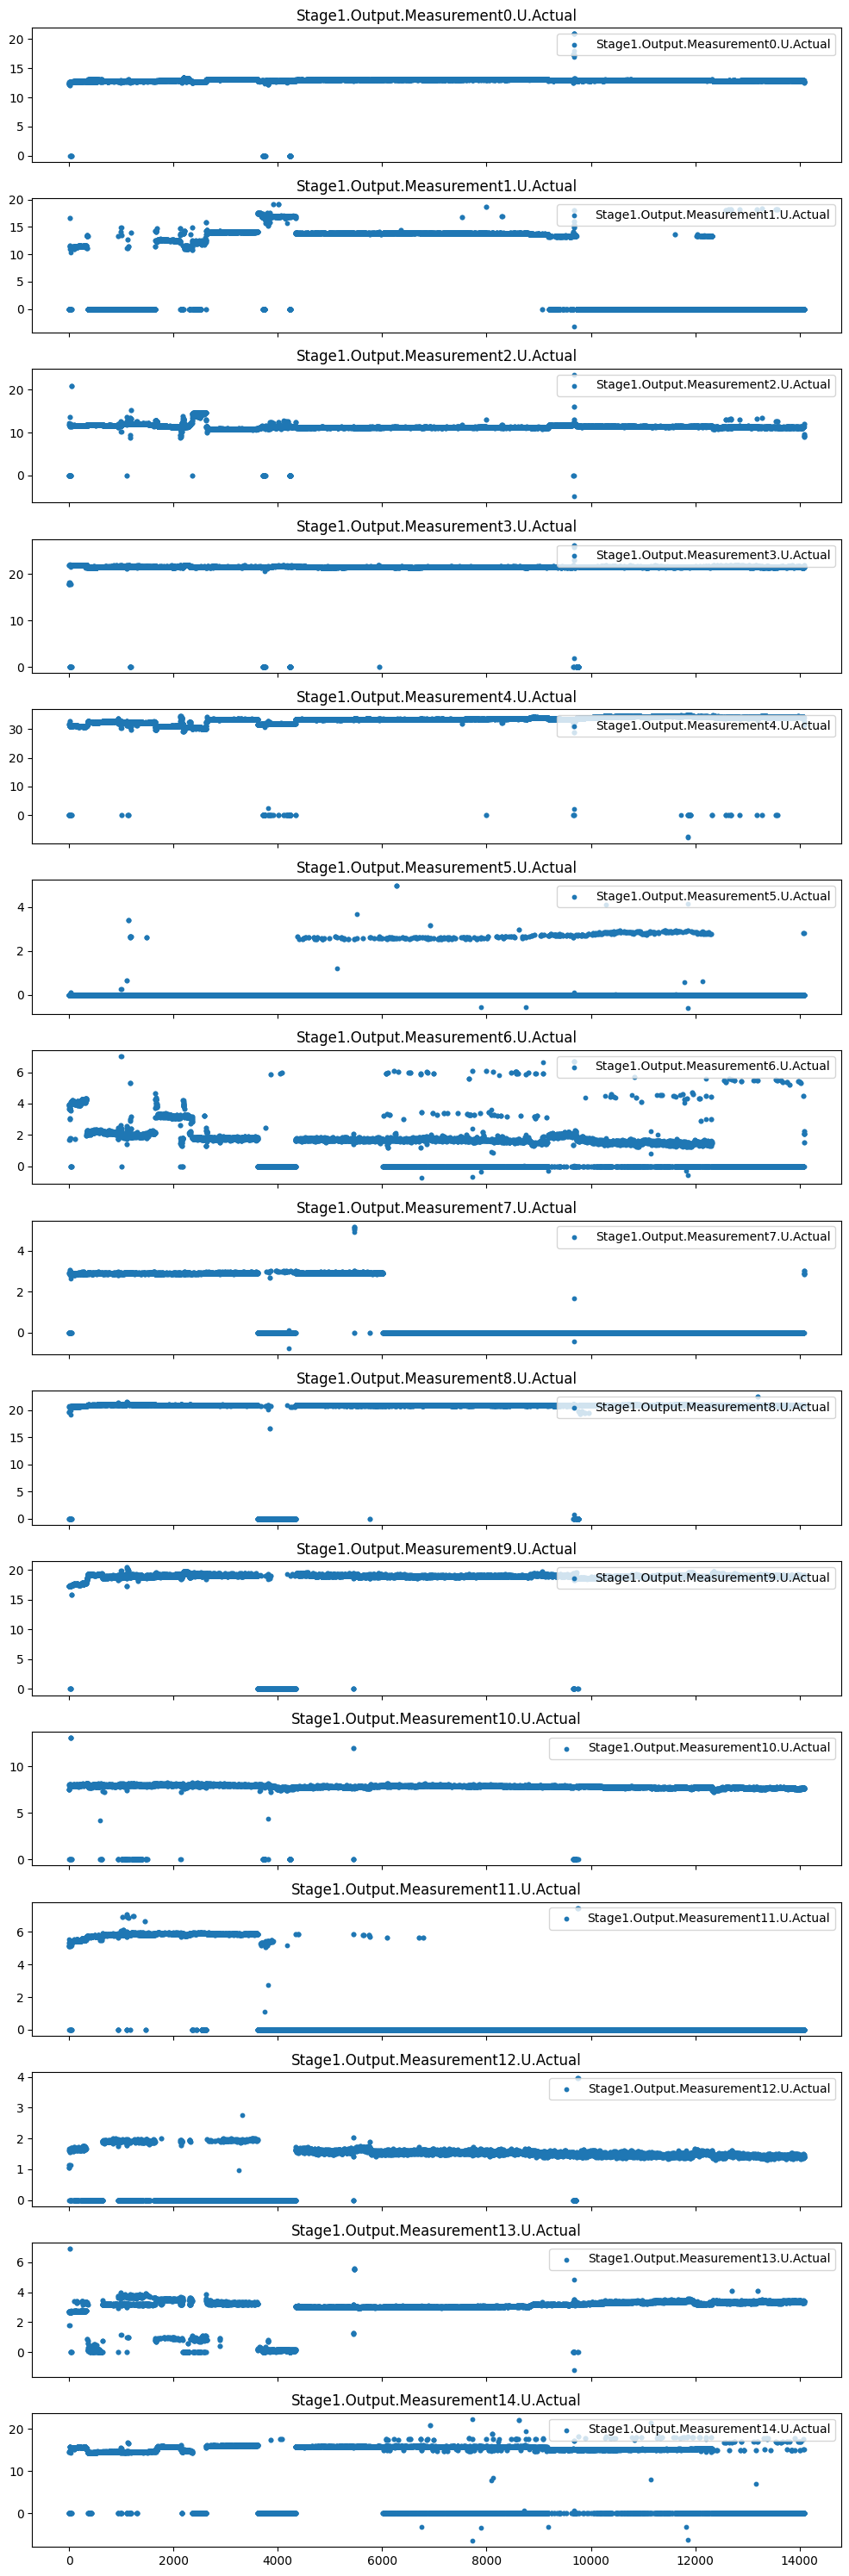

       AmbientConditions.AmbientHumidity.U.Actual  \
0                                           17.24   
1                                           17.24   
2                                           17.24   
3                                           17.24   
4                                           17.24   
...                                           ...   
14083                                       13.84   
14084                                       13.84   
14085                                       13.84   
14086                                       13.84   
14087                                       13.84   

       AmbientConditions.AmbientTemperature.U.Actual  \
0                                              23.53   
1                                              23.53   
2                                              23.53   
3                                              23.53   
4                                              23.53   
...                        

In [15]:
if __name__ == '__main__':
    file_path = '../Data/continuous_factory_process.csv'
    df = load_data(file_path)
    df_processed_one = pre_processing_data(df)

    # Let's visualise the measurement outputs
    plotting_measurements(df_processed_one)

    df_processed_two = removing_other_measurements(df_processed_one)

    print(df_processed_two)

    # df_processed_two is the final pre-processed dataset that we will train our ML model on, so let's save this in the data folder
    df_processed_two.to_csv('../Data/Processed_Data.csv', index = False)